# Capstone Notebook

<h5> A description of the problem and a discussion of the background. </h5>

I am going to assume the position of a business man who wants to either open up a cafe in London. In London there are a lot of areas which are saturated with coffee shops. To ensure I have the best chances of succeeding I would like to open a cafe in an area where cafe's are one of the least (or atleast less) cafe dense areas. 

<h6> A description of the data and how it will be used to solve the problem. </h6>

The data I will be using will be sourced from Wikipedia inititally for the post codes in United Kingdom. I will then source the areas that are in London. This will then be connecting with the fourspace API to explore nearby venues in each region. I will leave other venues to be included in each region as I want to be able to cluster areas that have a number of venues as well as coffee shops; e.g not just cluster based on the number of coffee shops. I hope to find a cluster of points formed for areas which there are lots of other venues but cafe's are one of the least popular venues.


<h3> Sourcing data </h3>

In [1]:
#importing relevant libraries
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
#reading the dataset
dj = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs')

In [3]:
dj[0]

,0,1,2,3,4,5,6,7,8,9
0,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
1,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
2,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
3,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
4,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
5,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
6,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
7,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
8,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
9,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30


In [4]:
dj=dj[0]

In [5]:
#assigning appropriate colums
dj=dj[[0,7,8]]

In [6]:
dj

,0,7,8
0,Borough,Population (2013 est)[1],Co-ordinates
1,Barking and Dagenham [note 1],194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
2,Barnet,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
3,Bexley,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
4,Brent,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
5,Bromley,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E
6,Camden,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W
7,Croydon,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W
8,Ealing,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W
9,Enfield,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W


In [7]:
#making first row of dataframe our column headers
dj=dj.rename(columns=dj.iloc[0]).drop(dj.index[0])

In [8]:
dj.head()

,Borough,Population (2013 est)[1],Co-ordinates
1,Barking and Dagenham [note 1],194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
2,Barnet,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
3,Bexley,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
4,Brent,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
5,Bromley,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E


In [9]:
#using regular expressions to clean the dataset
import re 

def tidy(x):
    x = re.sub('\[(.*?)\]','',x)
    return x
    
def coord(x):
    x = re.sub('\/(.*)','',x)
    x= re.sub('[﻿″′]','',x)
    x= re.sub('°','.',x)
    x= re.sub('[NEWS]','',x)
    y = x.split()
    return y

In [10]:
#applying the function I created
dj['Co-ordinates']=dj['Co-ordinates'].apply(lambda x: coord(x))

In [11]:
dj['Borough'] = dj['Borough'].apply(lambda x: tidy(x))

In [12]:
dj.head()

,Borough,Population (2013 est)[1],Co-ordinates
1,Barking and Dagenham,194352,"[51.3339, 0.0921]"
2,Barnet,369088,"[51.3731, 0.0906]"
3,Bexley,236687,"[51.2718, 0.0902]"
4,Brent,317264,"[51.3332, 0.1654]"
5,Bromley,317899,"[51.2414, 0.0111]"


In [13]:
dj['Longitude']=dj['Co-ordinates'].apply(lambda x: x[1])

In [14]:
dj.head()

,Borough,Population (2013 est)[1],Co-ordinates,Longitude
1,Barking and Dagenham,194352,"[51.3339, 0.0921]",0.0921
2,Barnet,369088,"[51.3731, 0.0906]",0.0906
3,Bexley,236687,"[51.2718, 0.0902]",0.0902
4,Brent,317264,"[51.3332, 0.1654]",0.1654
5,Bromley,317899,"[51.2414, 0.0111]",0.0111


In [15]:
dj['Latitude']=dj['Co-ordinates'].apply(lambda x: x[0])

In [16]:
dj.head()

,Borough,Population (2013 est)[1],Co-ordinates,Longitude,Latitude
1,Barking and Dagenham,194352,"[51.3339, 0.0921]",0.0921,51.3339
2,Barnet,369088,"[51.3731, 0.0906]",0.0906,51.3731
3,Bexley,236687,"[51.2718, 0.0902]",0.0902,51.2718
4,Brent,317264,"[51.3332, 0.1654]",0.1654,51.3332
5,Bromley,317899,"[51.2414, 0.0111]",0.0111,51.2414


In [17]:
#dropping unneccessary column
dj.drop('Co-ordinates',axis=1,inplace=True)

In [18]:
dj=dj.rename(columns={dj.columns[1]:'population'})

In [19]:
dj.head()

,Borough,population,Longitude,Latitude
1,Barking and Dagenham,194352,0.0921,51.3339
2,Barnet,369088,0.0906,51.3731
3,Bexley,236687,0.0902,51.2718
4,Brent,317264,0.1654,51.3332
5,Bromley,317899,0.0111,51.2414


In [20]:
#Using foursquare's credentials

CLIENT_ID = 'CWADAKOPPJQ52TVTMWKZBY1XCMZSHYNGPX1Y5XHONGL3YB3Z' # your Foursquare ID
CLIENT_SECRET = '0V12PNIEVV5YBAISXCBYHEENZX11PNIVNORFZOU4SDJ53YFX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CWADAKOPPJQ52TVTMWKZBY1XCMZSHYNGPX1Y5XHONGL3YB3Z
CLIENT_SECRET:0V12PNIEVV5YBAISXCBYHEENZX11PNIVNORFZOU4SDJ53YFX


In [21]:
#resetting and dropping old index
dj.reset_index(inplace=True)
dj.drop('index',axis=1,inplace=True)

In [22]:
dj.head()

,Borough,population,Longitude,Latitude
0,Barking and Dagenham,194352,0.0921,51.3339
1,Barnet,369088,0.0906,51.3731
2,Bexley,236687,0.0902,51.2718
3,Brent,317264,0.1654,51.3332
4,Bromley,317899,0.0111,51.2414


In [23]:
neighborhood_latitude = dj.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = dj.loc[0, 'Longitude'] # neighborhood longitude value


In [24]:

neighborhood_name = dj.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Barking and Dagenham  are 51.3339, 0.0921.


In [25]:
LIMIT = 300 # limit of number of venues returned by Foursquare API


radius = 3000 # define radius



# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=CWADAKOPPJQ52TVTMWKZBY1XCMZSHYNGPX1Y5XHONGL3YB3Z&client_secret=0V12PNIEVV5YBAISXCBYHEENZX11PNIVNORFZOU4SDJ53YFX&v=20180605&ll=51.3339,0.0921&radius=3000&limit=300'

In [26]:
from pandas.io.json import json_normalize 
import requests
output= requests.get(url).json()
output

{'meta': {'code': 200, 'requestId': '5e88cda61d67cb001b2b3713'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'London',
  'headerFullLocation': 'London',
  'headerLocationGranularity': 'city',
  'totalResults': 17,
  'suggestedBounds': {'ne': {'lat': 51.36090002700003,
    'lng': 0.1352345124434452},
   'sw': {'lat': 51.30689997299997, 'lng': 0.04896548755655479}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ba61ec7f964a520123539e3',
       'name': 'High Elms Country Park',
       'location': {'address': 'Shire Ln',
        'lat': 51.35165332894198,
        'lng': 0.07477827496217157,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.35165332894198,
       

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
venues = output['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,High Elms Country Park,Park,51.351653,0.074778
1,Coolings Garden Centre,Garden Center,51.329249,0.121391
2,"The Home of Charles Darwin, Down House",History Museum,51.331510,0.052865
3,Rose and Crown,Gastropub,51.350340,0.088443
4,Waitrose & Partners,Supermarket,51.355127,0.090159


In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

17 venues were returned by Foursquare.


In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=4000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
london_venues = getNearbyVenues(names=dj['Borough'],
                                   latitudes=dj['Latitude'],
                                   longitudes=dj['Longitude']
                                  )

Barking and Dagenham 
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich 
Hackney
Hammersmith and Fulham 
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [32]:
print(london_venues.shape)
london_venues.head()

(1148, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.3339,0.0921,High Elms Country Park,51.351653,0.074778,Park
1,Barking and Dagenham,51.3339,0.0921,Coolings Garden Centre,51.329249,0.121391,Garden Center
2,Barking and Dagenham,51.3339,0.0921,"The Home of Charles Darwin, Down House",51.331510,0.052865,History Museum
3,Barking and Dagenham,51.3339,0.0921,Rose and Crown,51.350340,0.088443,Gastropub
4,Barking and Dagenham,51.3339,0.0921,Waitrose & Partners,51.355127,0.090159,Supermarket


In [33]:
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barking and Dagenham,26,26,26,26,26,26
Barnet,77,77,77,77,77,77
Bexley,34,34,34,34,34,34
Brent,23,23,23,23,23,23
Bromley,33,33,33,33,33,33
Camden,16,16,16,16,16,16
Croydon,15,15,15,15,15,15
Ealing,61,61,61,61,61,61
Enfield,100,100,100,100,100,100


In [34]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 103 uniques categories.


In [35]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")



In [36]:

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])


In [37]:
london_onehot = london_onehot[fixed_columns]

In [38]:
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

In [39]:
london_onehot2=london_onehot[['Coffee Shop','Café','Neighborhood']]

In [40]:
london_onehot2['Total_cafe']=london_onehot2['Coffee Shop']+london_onehot2['Café']

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
london_grouped = london_onehot2.groupby('Neighborhood').mean().reset_index()
london_grouped

,Neighborhood,Coffee Shop,Café,Total_cafe
0,Barking and Dagenham,0.000000,0.000000,0.000000
1,Barnet,0.064935,0.000000,0.064935
2,Bexley,0.088235,0.000000,0.088235
3,Brent,0.000000,0.000000,0.000000
4,Bromley,0.090909,0.030303,0.121212
5,Camden,0.062500,0.000000,0.062500
6,Croydon,0.066667,0.000000,0.066667
7,Ealing,0.065574,0.032787,0.098361
8,Enfield,0.080000,0.000000,0.080000
9,Greenwich,0.117647,0.000000,0.117647


In [42]:
london_grouped= london_grouped.drop(['Café','Coffee Shop'],axis=1)

In [43]:
london_grouped.head()

,Neighborhood,Total_cafe
0,Barking and Dagenham,0.000000
1,Barnet,0.064935
2,Bexley,0.088235
3,Brent,0.000000
4,Bromley,0.121212


In [44]:
dj=dj.rename({'Borough':'Neighborhood'},axis=1)

In [45]:
london_merged=dj

london_merged = london_merged.join(london_grouped.set_index('Neighborhood'), on='Neighborhood')

In [46]:
london_merged.head()

,Neighborhood,population,Longitude,Latitude,Total_cafe
0,Barking and Dagenham,194352,0.0921,51.3339,0.000000
1,Barnet,369088,0.0906,51.3731,0.064935
2,Bexley,236687,0.0902,51.2718,0.088235
3,Brent,317264,0.1654,51.3332,0.000000
4,Bromley,317899,0.0111,51.2414,0.121212


In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
london_merged[['Total_cafe','population']] = scaler.fit_transform(london_merged[['Total_cafe','population']])

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [50]:
london_merged.head()

,Neighborhood,population,Longitude,Latitude,Total_cafe
0,Barking and Dagenham,0.178478,0.0921,51.3339,0.000000
1,Barnet,0.983127,0.0906,51.3731,0.519481
2,Bexley,0.373429,0.0902,51.2718,0.705882
3,Brent,0.744481,0.1654,51.3332,0.000000
4,Bromley,0.747405,0.0111,51.2414,0.969697


In [51]:
dj.sort_values(by=['population'],ascending=False)


,Neighborhood,population,Longitude,Latitude
6,Croydon,372752,0.0552,51.2217
1,Barnet,369088,0.0906,51.3731
7,Ealing,342494,0.1832,51.3047
8,Enfield,320524,0.0448,51.3914
23,Newham,318227,0.0249,51.3028
4,Bromley,317899,0.0111,51.2414
3,Brent,317264,0.1654,51.3332
20,Lambeth,314242,0.0659,51.2739
30,Wandsworth,310516,0.1128,51.2724
26,Southwark,298464,0.0449,51.3013


In [52]:
#Finding out 80 percent of the max population
pop = 372752*0.8
pop

298201.60000000003

<Figure size 720x2448 with 0 Axes>

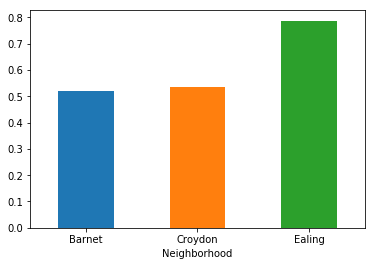

In [53]:
# regions that have a population >0.8 (>298201)
londonp2=london_merged['population']>0.8
londonp2=london_merged[londonp2]
plt.figure(figsize=(10,34))
ax = londonp2.plot.bar(x='Neighborhood', y='Total_cafe', rot=0)
legend=ax.get_legend()
legend.remove()

In [54]:
londonp2

,Neighborhood,population,Longitude,Latitude,Total_cafe
1,Barnet,0.983127,0.0906,51.3731,0.519481
6,Croydon,1.000000,0.0552,51.2217,0.533333
7,Ealing,0.860664,0.1832,51.3047,0.786885


In [55]:
london_merged["population"] = pd.to_numeric(london_merged["population"], downcast="float")

In [56]:
london_merged["population"][1]

0.9831275

In [57]:
#importing libraries to handle clustering of neighborhoods
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


In [58]:
# set number of clusters
kclusters = 4

london_clustering = london_merged.drop(['Neighborhood','Latitude','Longitude'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 1, 0, 2, 0, 2, 2, 2, 1])

In [59]:
# add clustering labels
london_merged.insert(0, 'Cluster Labels', kmeans.labels_)


In [60]:
london_merged.head(10)

,Cluster Labels,Neighborhood,population,Longitude,Latitude,Total_cafe
0,3,Barking and Dagenham,0.178478,0.0921,51.3339,0.000000
1,2,Barnet,0.983127,0.0906,51.3731,0.519481
2,1,Bexley,0.373429,0.0902,51.2718,0.705882
3,0,Brent,0.744481,0.1654,51.3332,0.000000
4,2,Bromley,0.747405,0.0111,51.2414,0.969697
5,0,Camden,0.341341,0.0732,51.3144,0.500000
6,2,Croydon,1.000000,0.0552,51.2217,0.533333
7,2,Ealing,0.860664,0.1832,51.3047,0.786885
8,2,Enfield,0.759493,0.0448,51.3914,0.640000
9,1,Greenwich,0.499240,0.0353,51.2921,0.941176


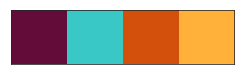

In [61]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

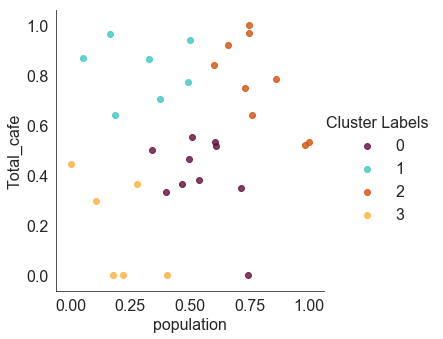

In [62]:
#plot data with seaborn
facet = sns.lmplot(data=london_merged, x='population', y='Total_cafe', hue='Cluster Labels', 
                   fit_reg=False, legend=True, legend_out=True)

Cluster 0 is both exhibiting properties of borough's with low/medium number of cafe's with medium/large population

In [63]:
cluster_0 = london_merged['Cluster Labels'] == 0

In [64]:
#These are the borough's in cluster 0 as we wanted
london_merged[cluster_0].reset_index(drop='index')

,Cluster Labels,Neighborhood,population,Longitude,Latitude,Total_cafe
0,0,Brent,0.744481,0.1654,51.3332,0.000000
1,0,Camden,0.341341,0.0732,51.3144,0.500000
2,0,Hackney,0.468714,0.0319,51.3242,0.363636
3,0,Haringey,0.496376,0.0643,51.3600,0.463768
4,0,Havering,0.398263,0.1101,51.3452,0.333333
5,0,Hillingdon,0.604224,0.2834,51.3239,0.533333
6,0,Redbridge,0.610974,0.0427,51.3332,0.516129
7,0,Tower Hamlets,0.540141,0.0021,51.3036,0.380952
8,0,Waltham Forest,0.507478,0.0048,51.3527,0.551724
9,0,Wandsworth,0.713407,0.1128,51.2724,0.347826
